In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_train = pd.read_csv('csv파일/train.csv')
df_test = pd.read_csv('csv파일/test.csv')

<AxesSubplot:>

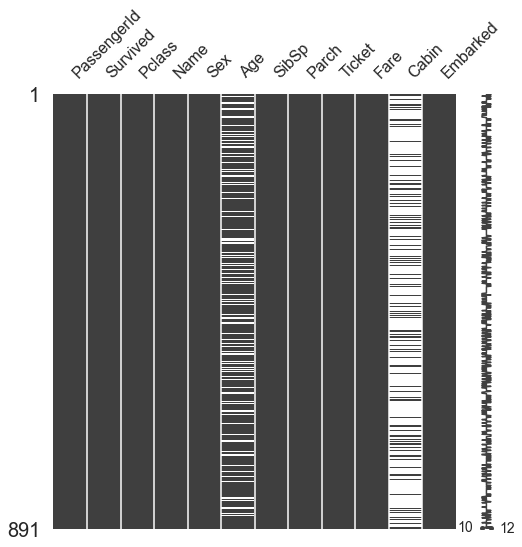

In [13]:
msno.matrix(df=df_train, figsize=(8,8))

In [14]:
for col in df_train.columns :
    msg = 'column : {:>11}\t percent of NaN : {:.1f}%'.format(col, df_train[col].isnull().sum()/df_train[col].shape[0]*100)
    print(msg)

column : PassengerId	 percent of NaN : 0.0%
column :    Survived	 percent of NaN : 0.0%
column :      Pclass	 percent of NaN : 0.0%
column :        Name	 percent of NaN : 0.0%
column :         Sex	 percent of NaN : 0.0%
column :         Age	 percent of NaN : 19.9%
column :       SibSp	 percent of NaN : 0.0%
column :       Parch	 percent of NaN : 0.0%
column :      Ticket	 percent of NaN : 0.0%
column :        Fare	 percent of NaN : 0.0%
column :       Cabin	 percent of NaN : 77.1%
column :    Embarked	 percent of NaN : 0.2%


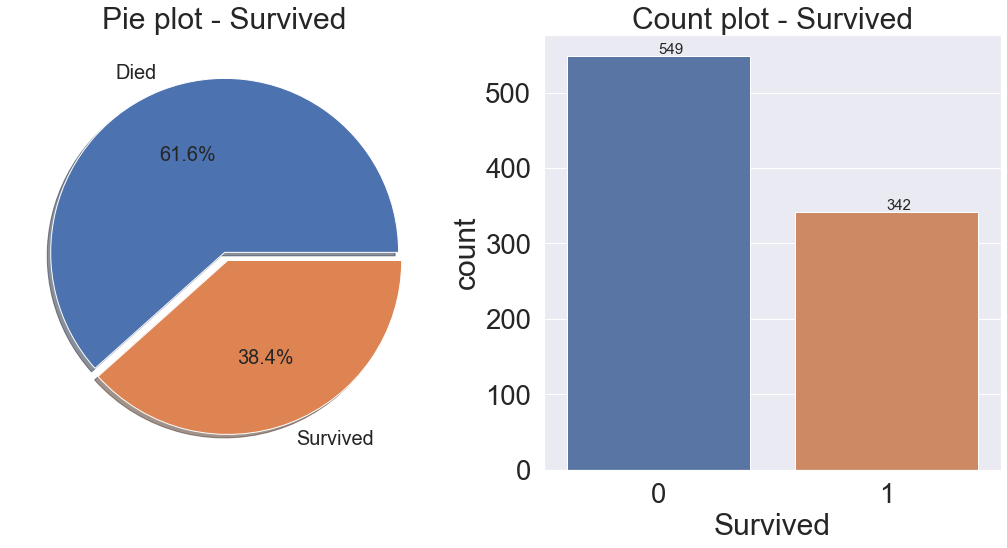

In [16]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%.1f%%', textprops={'size':20}, shadow=True, labels=['Died','Survived'])
ax[0].set_ylabel('')
ax[0].set_title('Pie plot - Survived')

sns.countplot('Survived',data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

for p in ax[1].patches :
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., height+3, height, size=15)

In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.02, 'Pclass : Survived vs Dead')

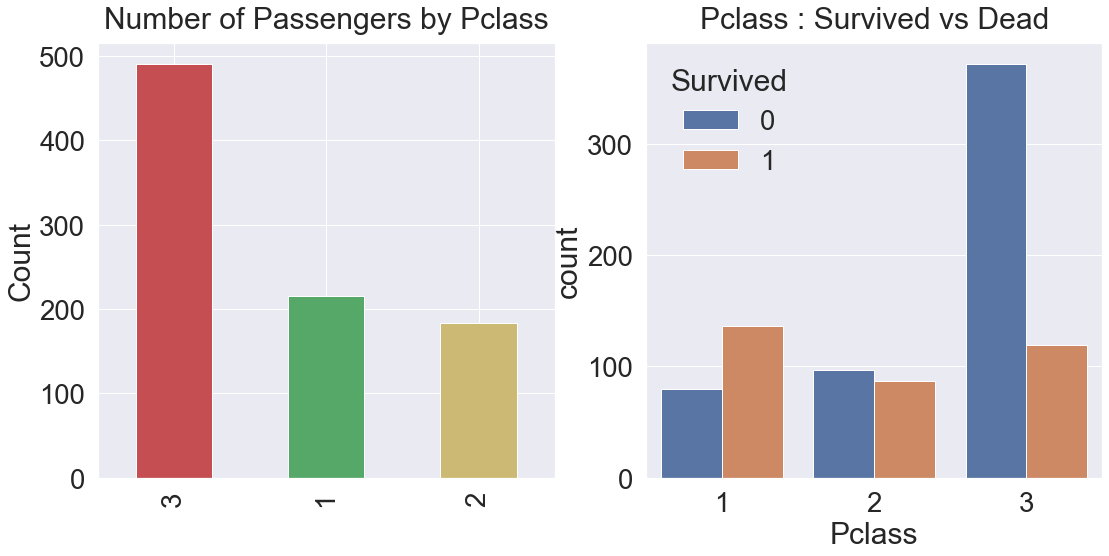

In [18]:
f, ax= plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().sort_values(ascending=False).plot.bar(ax=ax[0],color=['r','g','y'])
ax[0].set_title('Number of Passengers by Pclass', y=1.02)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=1.02)


2.2 Both Sex and Pclass

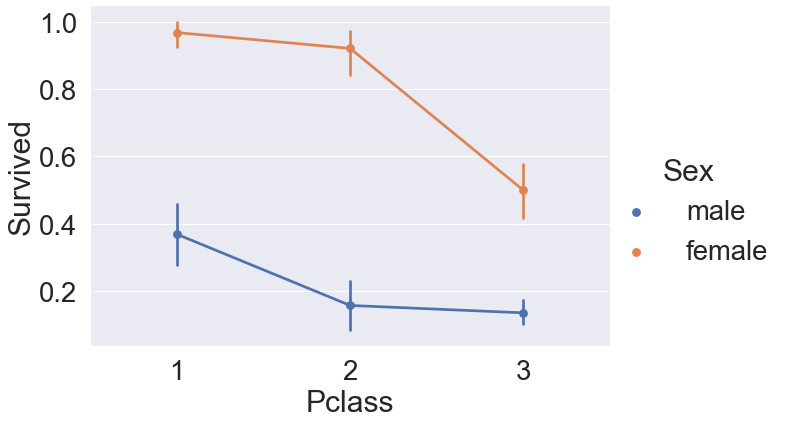

In [20]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, aspect=1.5, size=6)

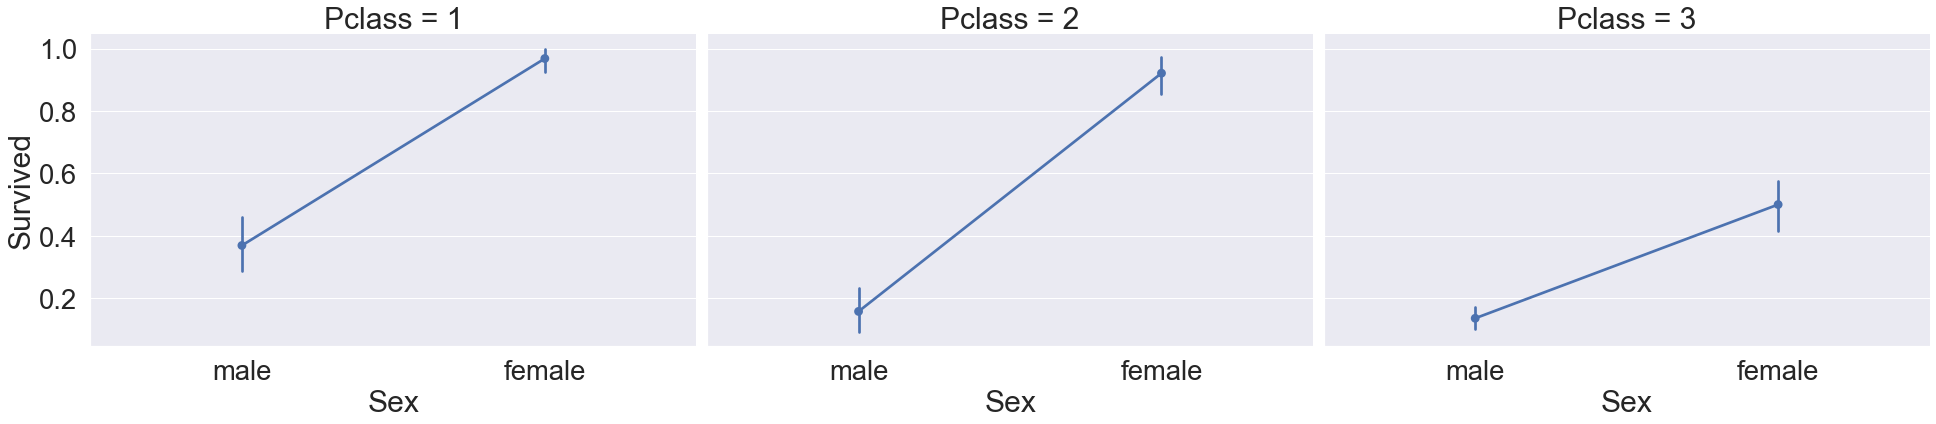

In [23]:
sns.factorplot('Sex','Survived',col='Pclass',data=df_train, size=6, aspect=1.5)

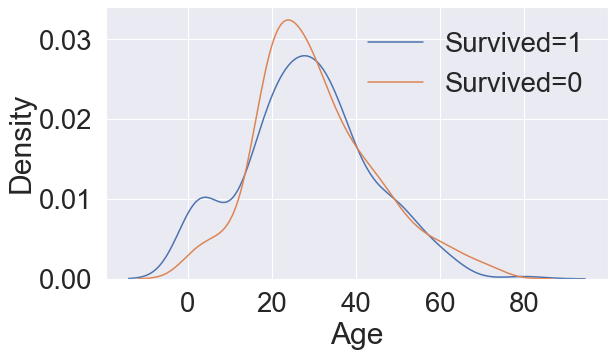

In [31]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived=1','Survived=0'])

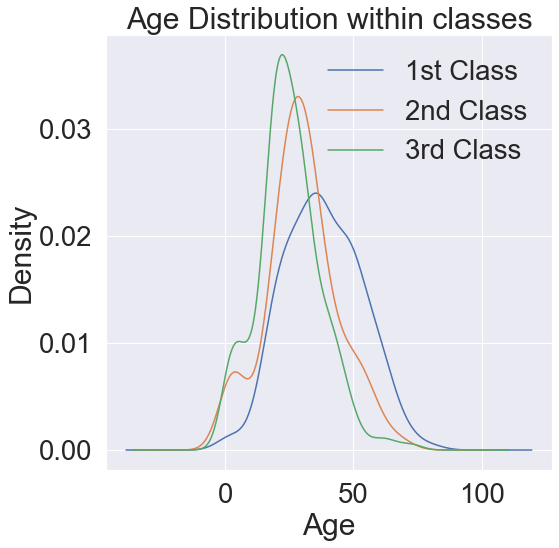

In [57]:
plt.figure(figsize=(8,8))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

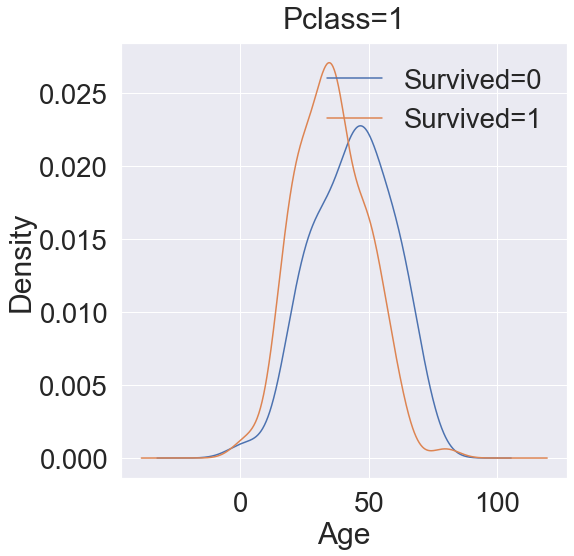

In [90]:
plt.figure(figsize=(8,8))

df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'].plot.kde()
df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'].plot.kde()
plt.title('Pclass=1', y=1.02)
plt.xlabel('Age')
plt.legend(['Survived=0','Survived=1'],loc='upper right')

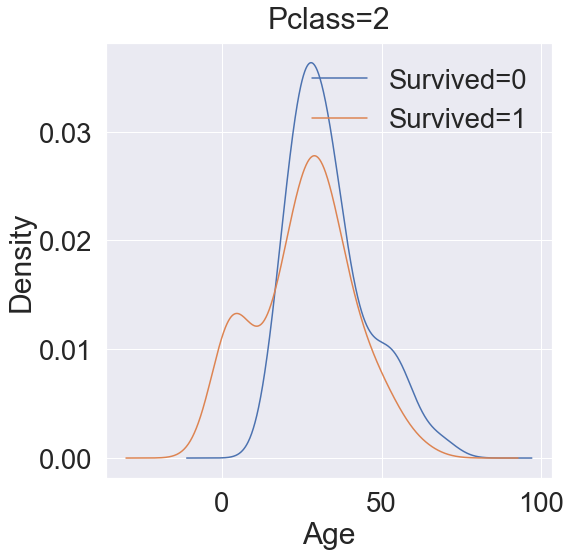

In [92]:
plt.figure(figsize=(8,8))
df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'].plot.kde()
df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'].plot.kde()
plt.title('Pclass=2', y=1.02)
plt.xlabel('Age')
plt.legend(['Survived=0','Survived=1'],loc='upper right')

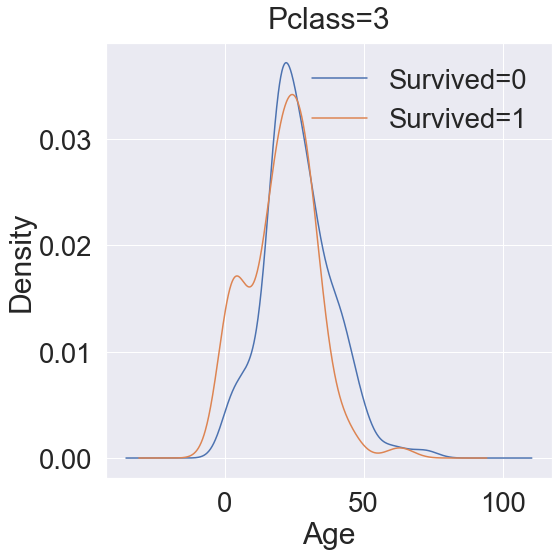

In [93]:
plt.figure(figsize=(8,8))
df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'].plot.kde()
df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'].plot.kde()
plt.title('Pclass=3', y=1.02)
plt.xlabel('Age')
plt.legend(['Survived=0','Survived=1'],loc='upper right')

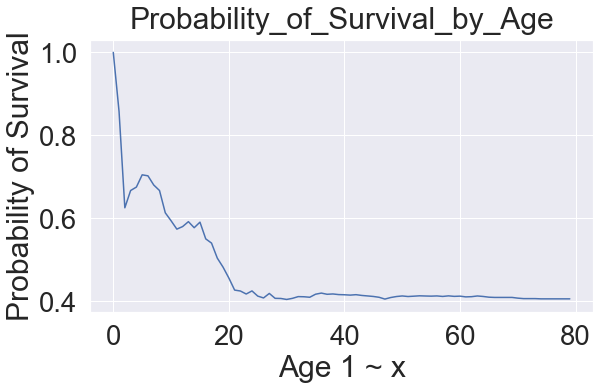

In [95]:
# 연령에 따른 생존확률

probability_of_survival_by_age = []

for age in range(1,81) :
    probability_of_survival_by_age.append(df_train[df_train['Age']<age]['Survived'].sum()/len(df_train[df_train['Age']<age]['Survived']))

plt.figure(figsize=(9,5))
plt.plot(probability_of_survival_by_age)
plt.xlabel('Age 1 ~ x')
plt.ylabel('Probability of Survival')
plt.title('Probability_of_Survival_by_Age', y=1.02)
plt.show()

Pclass, Sex, Age

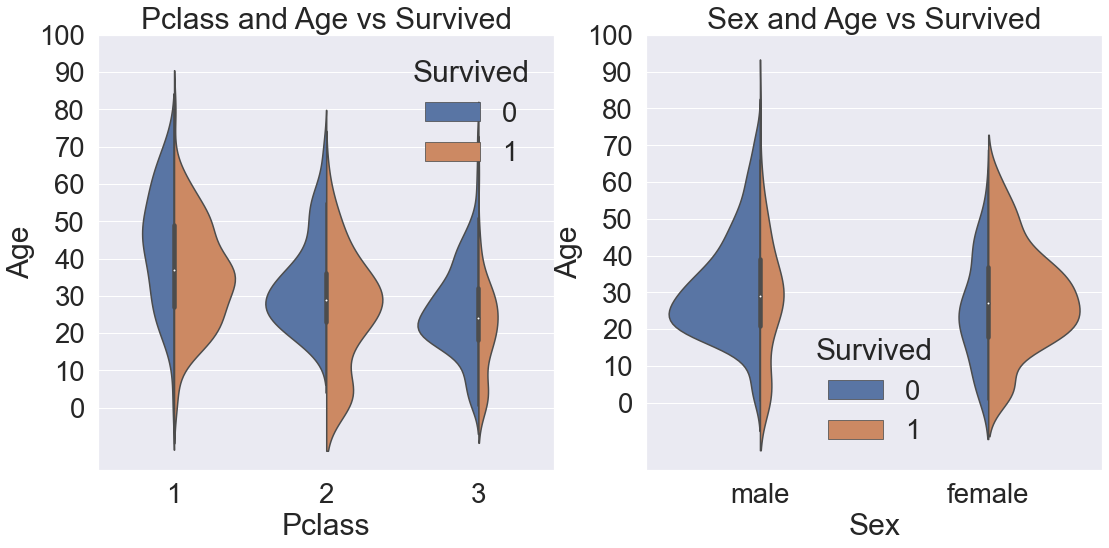

In [102]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count', split=True, ax=ax[0]) # scale=count : 바이올린의 넓이는 value의 갯수
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))


Embarked

<AxesSubplot:xlabel='Embarked'>

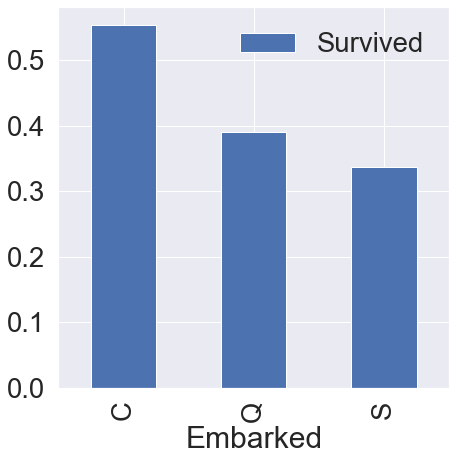

In [108]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby('Embarked', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

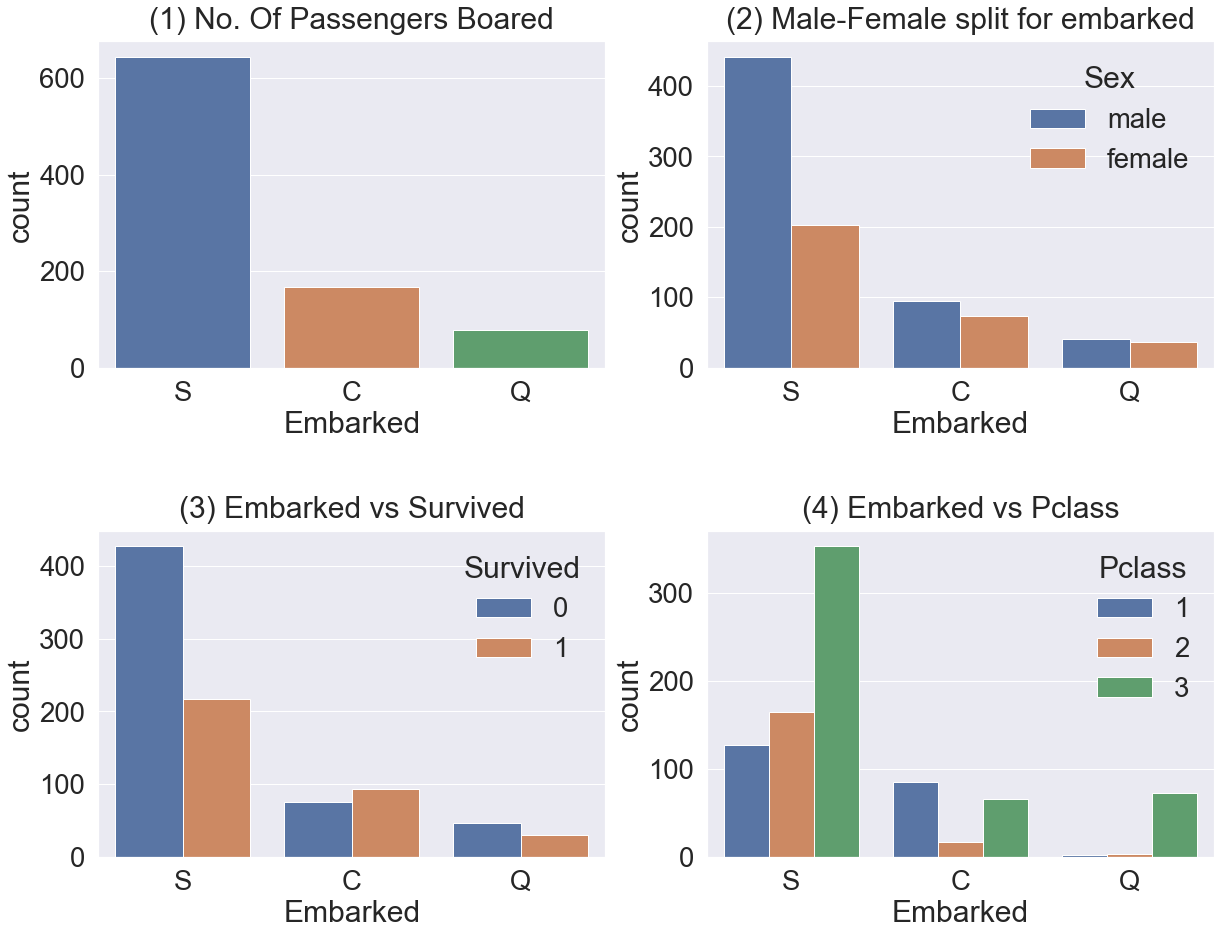

In [121]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared', y=1.02)

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked', y=1.02)

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived',y=1.02)

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5) # 간격 조정

Family - SibSp + Parch (형제자매 + 부모)

In [137]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1

Text(0.5, 1.02, '(3) Survived rate depending on FamilySize')

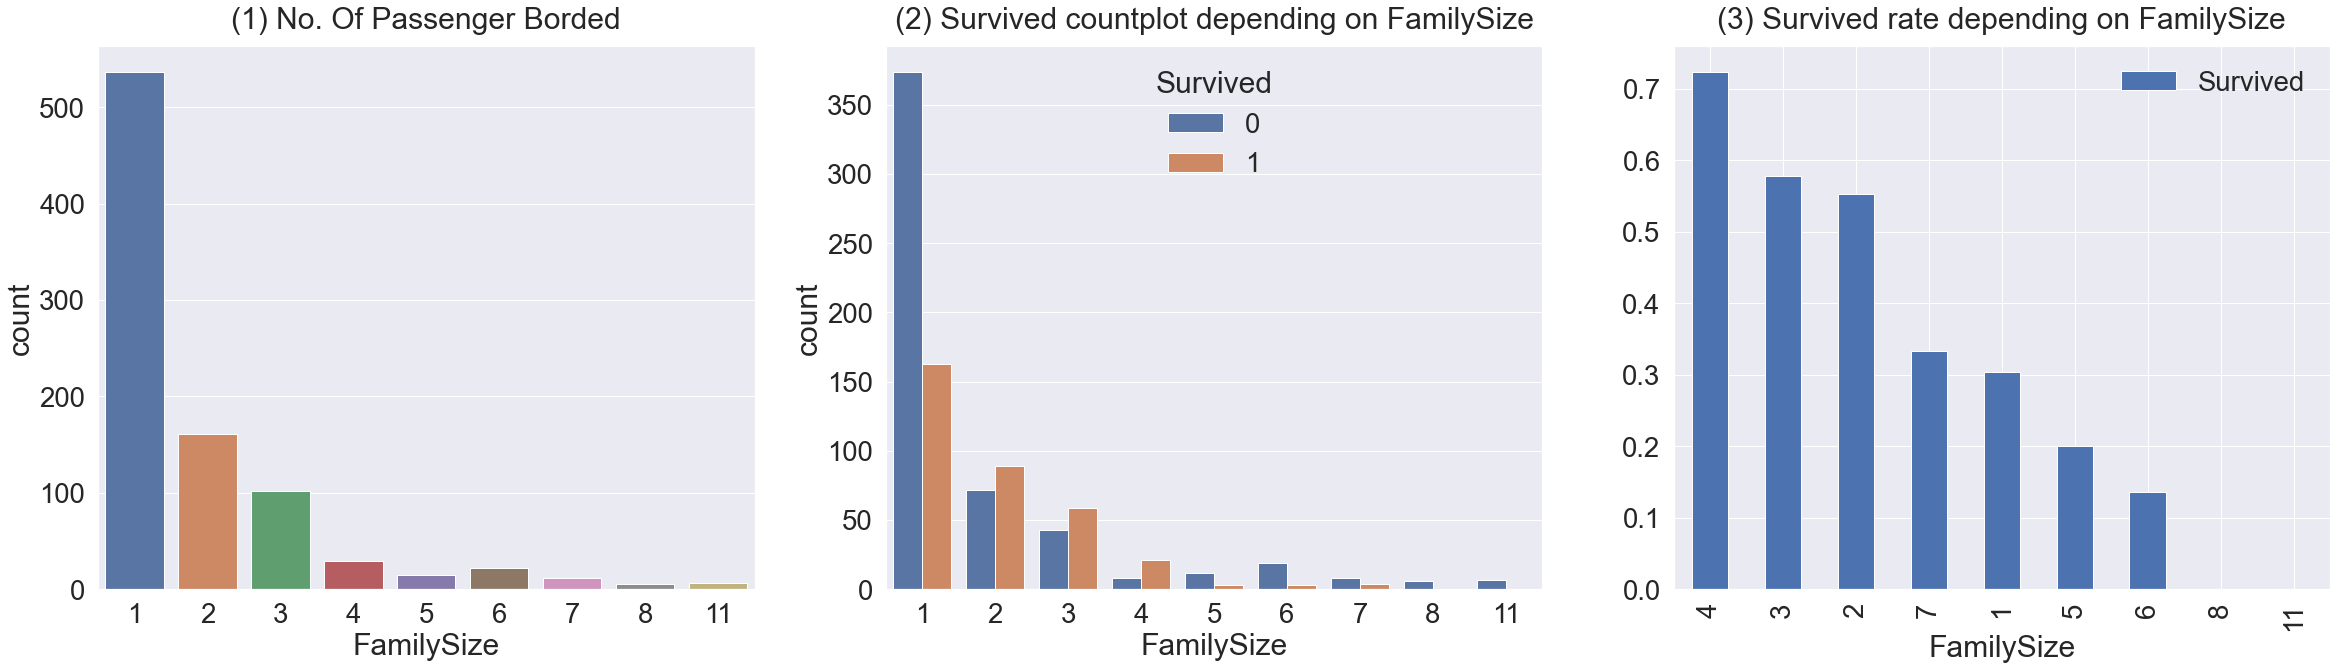

In [138]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Borded', y=1.02)

sns.countplot('FamilySize',hue='Survived' ,data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby('FamilySize',as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

Fare